In [1]:
from meteostat import Hourly, Stations
from geopy.geocoders import Nominatim
from datetime import datetime

In [2]:
start_time = datetime(2015,1,1)
end_time = datetime(2022,4,24)

In [3]:
stations = Stations()
stations = stations.region('US', 'CO')
stations = stations.inventory('hourly',(start_time.strftime('%Y-%m-%d %H:%M:%S'), end_time.strftime('%Y-%m-%d %H:%M:%S')),)
print('Total CO stations to look at: %d' %(stations.count()) )
df_stations = stations.fetch()
station_ids = df_stations.index.to_list()
df_stations.head()

Total CO stations to look at: 46


,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
72462,San Luis Valley Regional,US,CO,72462,KALS,37.4333,-105.8667,2297.0,America/Denver,1973-01-01,2022-04-30,1948-01-01,2022-04-23,1948-01-01,2022-01-01
72463,La Junta / La Junta Village,US,CO,72463,KLHX,38.0500,-103.5097,1289.0,America/Denver,1942-11-01,2022-04-30,1942-11-02,2022-04-25,1943-01-01,2021-01-01
72464,Pueblo Memorial Airport,US,CO,72464,KPUB,38.2833,-104.5000,1440.0,America/Denver,1942-10-01,2022-04-30,1942-10-01,2022-04-24,1942-01-01,2022-01-01
72466,Colorado Springs Muni,US,CO,72466,KCOS,38.8167,-104.7167,1885.0,America/Denver,1942-09-01,2022-04-30,1942-09-01,2022-04-24,1942-01-01,2022-01-01
72468,Fort Carson,US,CO,72468,KFCS,38.7000,-104.7667,1789.0,America/Denver,1966-09-15,2022-04-30,1966-09-15,2022-04-25,1970-01-01,2020-01-01


In [4]:
data = Hourly(station_ids, start_time.replace(tzinfo=None), end_time.replace(tzinfo=None), timezone='US/Mountain')
data = data.normalize()
# data = data.interpolate(24)
df_weather = data.fetch()
df_tmp = df_weather.reset_index(level = 'station')
df_weather.head()

temp  dwpt  rhum  prcp  snow   wdir  wspd  \
station time                                                                   
72462   2015-01-01 00:00:00-07:00 -19.4 -21.7  82.0   0.0   NaN    NaN   0.0   
        2015-01-01 01:00:00-07:00 -20.0 -22.1  83.0   0.0   NaN    NaN   0.0   
        2015-01-01 02:00:00-07:00 -21.7 -24.4  79.0   0.0   NaN    NaN   0.0   
        2015-01-01 03:00:00-07:00 -22.8 -25.0  82.0   0.0   NaN  360.0   5.4   
        2015-01-01 04:00:00-07:00   NaN   NaN   NaN   0.0   NaN    NaN   NaN   

                                   wpgt    pres  tsun  coco  
station time                                                 
72462   2015-01-01 00:00:00-07:00   NaN  1026.0   NaN   NaN  
        2015-01-01 01:00:00-07:00   NaN  1025.1   NaN   NaN  
        2015-01-01 02:00:00-07:00   NaN  1024.5   NaN   NaN  
        2015-01-01 03:00:00-07:00   NaN  1024.3   NaN   NaN  
        2015-01-01 04:00:00-07:00   NaN     NaN   NaN   NaN

,station,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,,
2021-12-31 12:00:00-07:00,72462,2.2,-6.6,52.0,0.0,NaN,210.0,55.4,NaN,1001.0,NaN,NaN
2021-12-31 13:00:00-07:00,72462,3.9,-6.7,46.0,0.0,NaN,200.0,50.0,NaN,999.2,NaN,NaN
2021-12-31 14:00:00-07:00,72462,3.3,-7.2,46.0,0.0,NaN,220.0,50.0,NaN,997.6,NaN,NaN
2021-12-31 15:00:00-07:00,72462,2.2,-6.2,54.0,0.0,NaN,200.0,42.5,NaN,998.6,NaN,NaN
2021-12-31 16:00:00-07:00,72462,2.2,-6.6,52.0,0.0,NaN,200.0,40.7,NaN,997.9,NaN,NaN


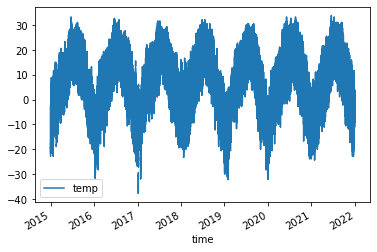

In [5]:
# Test plot for a single station
df_tmp[df_tmp.station == '72462'].plot(y='temp')
df_tmp[df_tmp.station == '72462'].tail(5)

In [6]:
# Add a county column to the stations directory
geolocator = Nominatim(user_agent='geoapiExercises')

counties = []
for s in range(len(df_stations)):
    lat = str(df_stations['latitude'][s])
    long = str(df_stations['longitude'][s])
    
    location = geolocator.reverse(lat+','+long)
    counties.append(location.raw['address'].get('county'))
    
df_stations['county'] = counties
df_stations.head()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,county
id,,,,,,,,,,,,,,,,
72462,San Luis Valley Regional,US,CO,72462,KALS,37.4333,-105.8667,2297.0,America/Denver,1973-01-01,2022-04-25,1948-01-01,2022-04-22,1948-01-01,2022-01-01,Alamosa County
72463,La Junta / La Junta Village,US,CO,72463,KLHX,38.0500,-103.5097,1289.0,America/Denver,1942-11-01,2022-04-25,1942-11-02,2022-04-23,1943-01-01,2021-01-01,Otero County
72464,Pueblo Memorial Airport,US,CO,72464,KPUB,38.2833,-104.5000,1440.0,America/Denver,1942-10-01,2022-04-25,1942-10-01,2022-04-22,1942-01-01,2022-01-01,Pueblo County
72466,Colorado Springs Muni,US,CO,72466,KCOS,38.8167,-104.7167,1885.0,America/Denver,1942-09-01,2022-04-25,1942-09-01,2022-04-18,1942-01-01,2022-01-01,El Paso County
72468,Fort Carson,US,CO,72468,KFCS,38.7000,-104.7667,1789.0,America/Denver,1966-09-15,2022-04-25,1966-09-15,2022-04-23,1970-01-01,2020-01-01,El Paso County


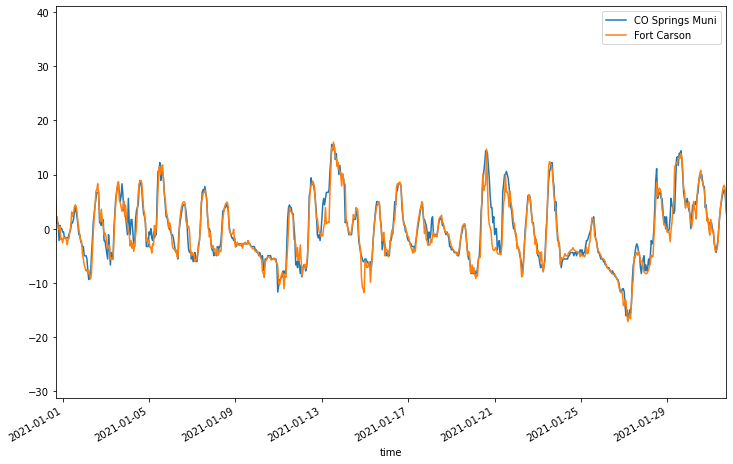

In [7]:
ax = df_tmp[df_tmp.station == '72466'].plot(y='temp', 
                                            label='CO Springs Muni', 
                                            xlim=('01-01-2021','02-01-2021'),
                                            figsize=(12,8))
df_tmp[df_tmp.station == '72468'].plot(y='temp', label='Fort Carson', ax=ax)
ax.legend();

In [8]:
location

Location(Telluride Regional Airport, Airport Road, San Miguel County, Colorado, United States, (37.953824749999995, -107.90882877855688, 0.0))

In [5]:
help(Hourly)

Help on class Hourly in module meteostat.interface.hourly:

class Hourly(meteostat.interface.timeseries.TimeSeries)
 |  Hourly(loc: Union[pandas.core.frame.DataFrame, meteostat.interface.point.Point, list, str], start: datetime.datetime = None, end: datetime.datetime = None, timezone: str = None, model: bool = True, flags: bool = False) -> None
 |  
 |  Retrieve hourly weather observations for one or multiple weather stations or
 |  a single geographical point
 |  
 |  Method resolution order:
 |      Hourly
 |      meteostat.interface.timeseries.TimeSeries
 |      meteostat.interface.meteodata.MeteoData
 |      meteostat.interface.base.Base
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, loc: Union[pandas.core.frame.DataFrame, meteostat.interface.point.Point, list, str], start: datetime.datetime = None, end: datetime.datetime = None, timezone: str = None, model: bool = True, flags: bool = False) -> None
 |      Initialize self.  See help(type(self)) for 

In [8]:
start_time = datetime(2022,4,30,6,0,0)
end_time = datetime(2022,5,1,18,0,0)

data = Hourly(station_ids[0], start_time.replace(tzinfo=None), end_time.replace(tzinfo=None), timezone='US/Mountain')
data = data.normalize()
df_weather = data.fetch()

In [11]:
df_weather.tail()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-05-01 14:00:00-06:00,21.4,-19.9,5.0,0.0,NaN,214.0,28.4,NaN,1002.0,NaN,NaN
2022-05-01 15:00:00-06:00,20.7,-18.2,6.0,0.0,NaN,222.0,31.0,NaN,1001.8,NaN,NaN
2022-05-01 16:00:00-06:00,21.2,-20.0,5.0,0.0,NaN,218.0,28.4,NaN,1000.3,NaN,NaN
2022-05-01 17:00:00-06:00,20.3,-20.7,5.0,0.0,NaN,221.0,30.6,NaN,999.8,NaN,NaN
2022-05-01 18:00:00-06:00,19.9,-20.9,5.0,0.0,NaN,234.0,31.0,NaN,999.2,NaN,NaN
